Merge Datasets:

In [7]:
import pandas as pd

df1 = pd.read_csv("MLB_Stats_Part1.csv")
df2 = pd.read_csv("MLB_Stats_Part2.csv")
df3 = pd.read_csv("MLB_Stats_Part3.csv")
df4 = pd.read_csv("MLB_Stats_Part4.csv")

# Merge dataframes on 'player_id' and 'year' columns.
merged_df = (
    df1.merge(df2, on=['player_id', 'year'], how='inner', suffixes=('_df1', '_df2')).
        merge(df3, on=['player_id', 'year'], how='inner', suffixes=('_df2', '_df3')).
        merge(df4, on=['player_id', 'year'], how='inner', suffixes=('_df3', '_df4'))
)

# Save merged files into new file
merged_df.to_csv('MLB_Stats_2015-2024.csv', index=False)

print('Merged completed.')

Merged completed.


In [8]:
# Print the merged data
# print(merged_df)

# Optionally, print only the first 5 rows for a quick preview
# print(merged_df.head())

print(merged_df.columns)


Index(['last_name, first_name_df1', 'player_id', 'year', 'player_age',
       'p_game', 'p_formatted_ip', 'pa', 'ab', 'hit', 'single',
       ...
       'breaking_avg_break', 'breaking_range_speed', 'n_offspeed_formatted',
       'offspeed_avg_speed', 'offspeed_avg_spin', 'offspeed_avg_break_x',
       'offspeed_avg_break_z', 'offspeed_avg_break_z_induced',
       'offspeed_avg_break', 'offspeed_range_speed'],
      dtype='object', length=304)


In [ ]:
#Load the merged dataset
merged_df = pd.read_csv('MLB_Stats_2015-2024.csv')

#Define performance metrics
performance_metric = 'p_formatted_ip'  
spin_rate_metric = 'offspeed_avg_spin'  #Spin rate
chase_rate_metric = 'breaking_avg_break'  #Chase rate
command_metric = 'n_offspeed_formatted'  #Command (offspeed pitch count as an example)

#Identify top performers for each year (Top 10 pitchers by performance)
top_pitchers_per_year = []
for year in merged_df['year'].unique():
    yearly_data = merged_df[merged_df['year'] == year]
    top_performers = yearly_data.nlargest(10, performance_metric)  #Top 10 performers by performance
    top_pitchers_per_year.append(top_performers)

#Combine yearly top performers
top_pitchers_df = pd.concat(top_pitchers_per_year)

#Identify pitchers consistently among the top performers
consistent_pitchers = (
    top_pitchers_df.groupby('player_id')
    .filter(lambda x: x['year'].nunique() > 2)  #Appear as top performer in more than 2 years
)

#Analyze common traits among top performers
common_traits = top_pitchers_df[[spin_rate_metric, chase_rate_metric, command_metric]].describe()

#Print Results
print("Consistent Top Performers (more than 2 years):")
print(consistent_pitchers[['player_id', 'year', performance_metric]])

print("\nCommon Traits of Top Performers:")
print(common_traits)

#Save results to CSV files
consistent_pitchers.to_csv('consistent_top_pitchers.csv', index=False)
common_traits.to_csv('common_traits_of_top_pitchers.csv')

print("\nAnalysis complete. Results saved to CSV files.")



Consistent Top Performers (more than 2 years):
      player_id  year  p_formatted_ip
38       453286  2015           228.2
14       425844  2015           222.2
27       446372  2015           222.0
72       518516  2015           218.1
149      453286  2016           228.1
133      434378  2016           227.2
183      518516  2016           226.2
139      446372  2016           215.0
255      434378  2017           206.0
260      446372  2017           203.2
311      543037  2017           203.0
251      425844  2017           202.1
337      594798  2017           201.1
382      453286  2018           220.2
447      594798  2018           217.0
374      446372  2018           215.0
370      434378  2018           214.0
455      605400  2018           212.1
367      425844  2018           207.2
431      571945  2018           200.2
489      434378  2019           223.0
592      669456  2019           214.1
522      543037  2019           212.1
487      425844  2019           208.2
514

C:\Users\19178\AppData\Local\Temp\ipykernel_57828\1430675733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistent_counts.index, y=consistent_counts.values, palette="viridis")


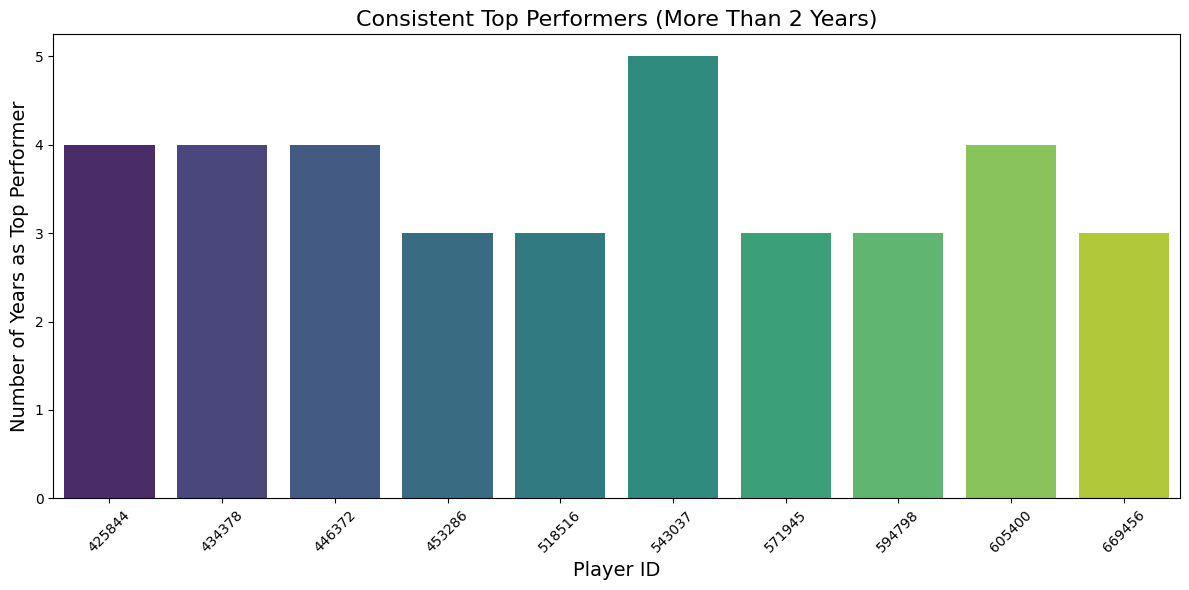

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Consistent Performers Over Time
consistent_counts = consistent_pitchers['player_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=consistent_counts.index, y=consistent_counts.values, palette="viridis")
plt.title('Consistent Top Performers (More Than 2 Years)', fontsize=16)
plt.xlabel('Player ID', fontsize=14)
plt.ylabel('Number of Years as Top Performer', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('consistent_top_performers.png')
plt.show()

